In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
from matplotlib import pyplot as plt

In [4]:
from src.cupido import Cupido

/home/gambacorta/Scrivania/cardio_cupido/pyenv_cupido/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
CUPIDOs = {
    'cav':Cupido('cav', cls_name='XGB'),
    'nav':Cupido('nav', cls_name='RF'),
    'erg':Cupido('erg', cls_name='RF'),
}

# XAI

In [7]:
from src.paths import DIR_PICKLE
import pickle

In [8]:
shap_values = {}

for target, cupido in CUPIDOs.items():

    # calc for current target will be skipped if relative shap values are already stored
    if target in shap_values:
        continue

    shap_values_dir = os.path.join(DIR_PICKLE, cupido.cls_folder, 'shap_values')
    os.makedirs(shap_values_dir, exist_ok=True)

    shap_values_path = os.path.join(shap_values_dir,target+'.pkl')
    # shap values relative to the current target are loaded as pickle if exist
    if os.path.exists(shap_values_path):
        with open(shap_values_path, 'rb') as f:
            shap_values[target] = pickle.load(f)
        continue

    # shap values relative to the current target are computed and saved as pickle object
    shap_values[target] = cupido.compute_shap_values(cupido.X.values)
    with open(shap_values_path,'wb') as f:
        pickle.dump(shap_values[target], f)


## Summary figures

In [9]:
from src.paths import DIR_IMGS, DIR_SMARTS
from src.target_configs import TARGET_NAMES

In [10]:
from src.summary_plot import summary_legacy

In [11]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [12]:
functionSorting = lambda x: np.argsort(np.max(np.abs(x),axis=0))

In [13]:
myC=ListedColormap(["lightgray","black"]).with_extremes(under="lightgray",over="black")

In [14]:
SMARTS=pd.read_csv(DIR_SMARTS, sep='\t', header=None).squeeze()

In [20]:
summary_figures = {}

for target,shap_target in shap_values.items():
    fig_sum=summary_legacy(
                            shap_target,
                            features_imgPath=DIR_IMGS,
                            cmap=myC,
                            custom_order=functionSorting,
                            plot_size=(8,14),
                            show=False,
                            max_display=10
)
    
    fig_sum.suptitle(TARGET_NAMES[target], y=1.02, x=0.5)
    plt.close(fig_sum)
    summary_figures[target]=fig_sum

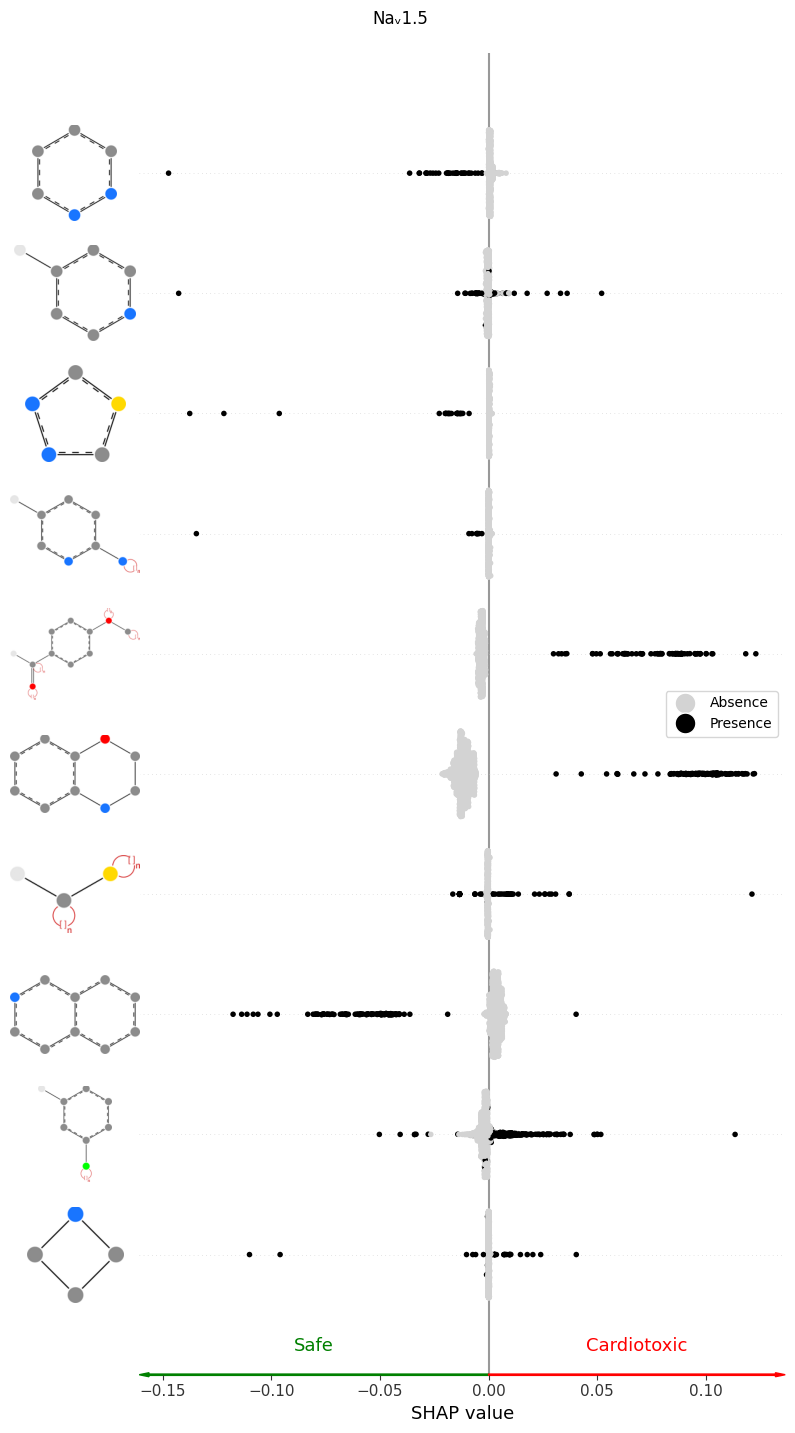

In [21]:
summary_figures['nav']